In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# kalman Filter (칼만 필터)

한마디 요약: 너무 많은 과거는 묻지 말아요<br/> 순서: t시점 추정 -> 보정 -> 추정


## X<sub>t</sub>  = F * X<sub>t-1</sub> + B* u<sub>t</sub> + w<sub>t</sub> <br/> y<sub>t</sub>  = A * X<sub>t</sub> + V<sub>t</sub>


X= 상태 (실제), y= 측정 (추정) 이라고 정의된다. <br/>F는 가중치로써 생각하고, B*U<sub>t</sub>=외부 입력, W<sub>t</sub> = 확률적 항 이라고 정의한다



결국 kalman Filter  에서 $\hat{X}$<sub>t</sub> 라는 정의는
##  $\hat{X}$<sub>t</sub>= K<sub>t</sub>  * y<sub>t</sub> + (1-K) *$\hat{X}$ <sub> t-1 </sub>
라고 정의 된다. 여기서 중요한 가정은 
> y<sub>t</sub> 은 추론이 가능하지만, 정확한 X<sub>t</sub> 라는것은 모르는 상태로 여긴다. 즉 여기서 앞서 한마디 요약 정리가 된다. 우리가 필요한 값은 시간기준으로 했을경우 1시간 전 하루 기준으로 하루전 데이터가 중요하다  



K 는 새로운 정보인 추정값 y<sub>t</sub> 와 예전 실제 데이터인 X<sub> t-1 </sub> 와의 균형을 맞추기 위해서 지정한 값이다.
식을 고려하기 앞서 
> ### P<sub>t</sub> = 상태의 공분산 추정 <br/>  P<sup>-</sup> = 시간 t 을 고려허기전의 추정 
>> 결국 V<sub>t</sub> 에대한 분산을 뜻함

이라고 정의하자

## 순서 : 예측 -> 필터링

### 예측
> ### $\hat{X}$<sup>-</sup> <sub> t </sub> = F * $\hat{X}$ <sub> t-1 </sub>+ B* u<sub>t</sub> <br/>
P<sup>-</sup> <sub> t </sub> = F * P <sub> t-1 </sub>+ F<sup> T</sup> * Q

### 필터링
> ### $\hat{X}$<sub> t </sub> = $\hat{X}$<sup>-</sup> <sub> t </sub> + k<sub>t</sub> *(- A * $\hat{X}$<sup>-</sup> <sub> t </sub> + y<sub>t</sub>)<br/> P<sub> t </sub> = (I-K <sub>t</sub> *A) * P<sup>-</sup> <sub> t </sub>


### 칼만 이득
> ### K<sub>t</sub> = P<sup>-</sup> <sub>t</sub> * A<sub>T</sub> * (A * P<sup>-</sup> <sub>t</sub> * A<sub>T</sub> + R) <sup>-1</sup>

# 구현코드

In [149]:
#변수 설정

def v(v0,a,t):
    return vp+a*t

def s(s,a,t):
    s=v(v0,a,t)
    return s*t+0.5*a*t*t


def lis(value,length):
    a=[]
    for i in range(0,length):
        a.append(value)
    return a

length=100 #시간의 길이

le=range(0,100)


a=lis(0.5,100)

x=lis(0,100) #위치
v=lis(0,100) #속도


In [150]:
for i in range(2,100):
    x[i]=v[i-1]*2 + x[i-1]+ 0.5*(a[i-1]**2)
    x[i]=x[i]+np.random.normal(0, 20)
    v[i]=v[i-1]+2*a[i-1]

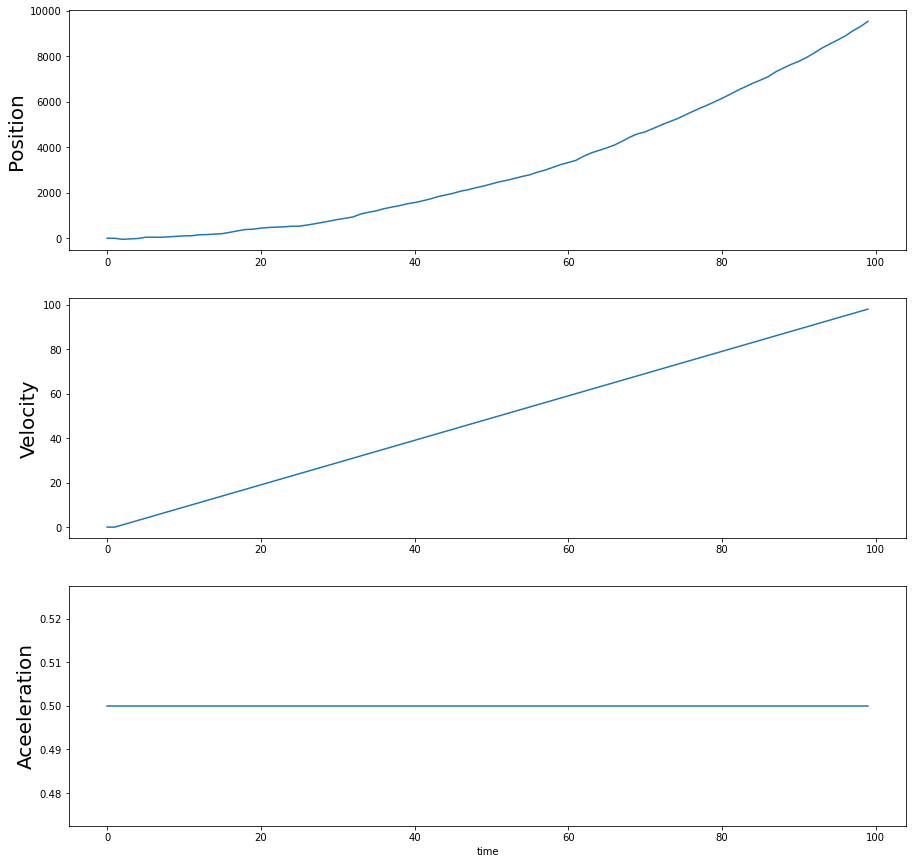

In [151]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(15,15))
ax1.plot(le,x)
ax1.set_ylabel('Position', fontsize=20)

ax2.plot(le,v)
ax2.set_ylabel('Velocity', fontsize=20)

ax3.plot(le,a)
ax3.set_ylabel('Aceeleration', fontsize=20)
plt.xlabel("time")

plt.show()

In [152]:
z=[]
for i in range(0,length):
    ran=np.random.normal(0, 300)
    z.append(x[i]+ran)

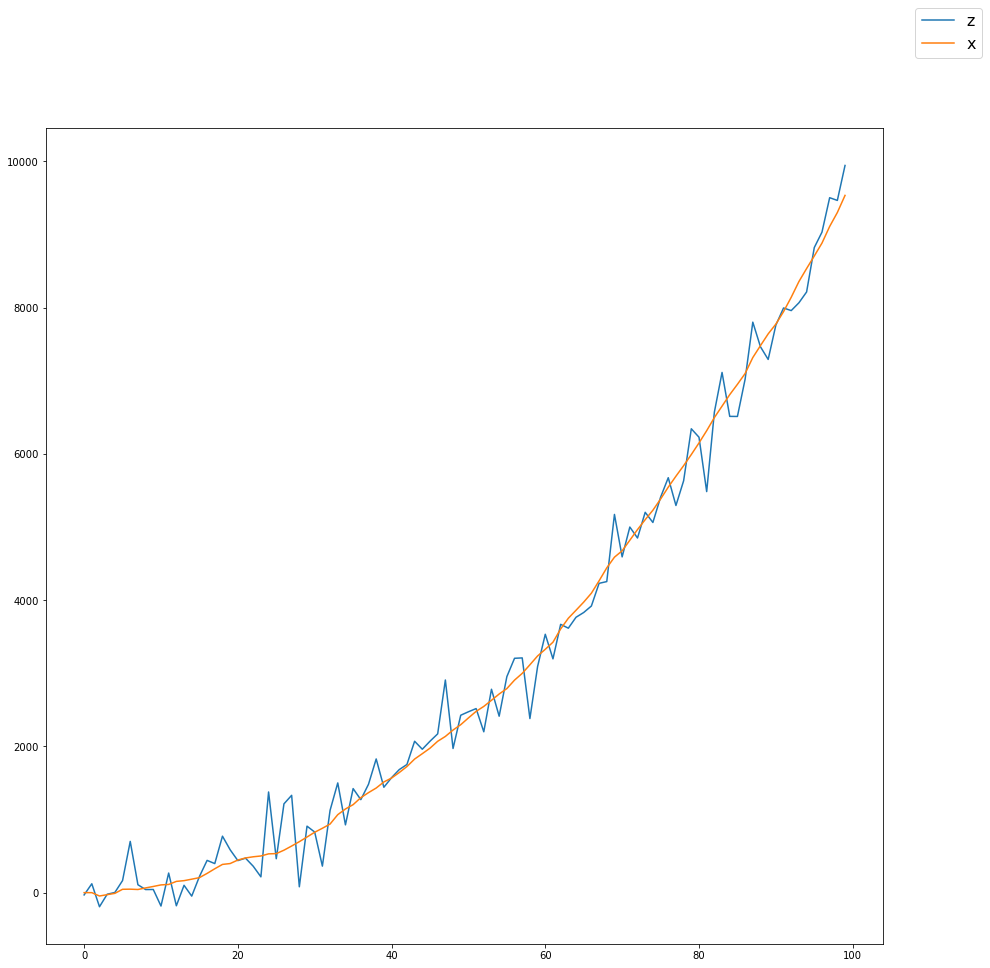

In [153]:
fig, (ax1) = plt.subplots(1, 1,figsize=(15,15))
ax1.plot(le,z)
ax1.plot(le,x)
fig.legend(["z","x"],fontsize=16)

In [187]:
def kalmanfilter_function(z,Q,R,A,H):
    sh=Q.shape[0]
    
    
    
    result_xhat=[]
    result_xhatminus=[]
    xhatminus=np.array(lis(0,length*sh)).reshape(length,sh)
    xhat=np.array(lis(0,length*sh)).reshape(length,sh)
    
    Pminus=np.array(lis(0,length*sh*sh)).reshape(sh,length,sh)
    P=np.array(lis(0,length*sh*sh)).reshape(sh,length,sh)
    
    K=np.array(lis(0,length*sh)).reshape(length,sh) #칼만이득
    
    P[:,0,:]=np.eye(N=sh,M=sh,k=1)
    
    for k in range(1,length):
        xhatminus[k,:]=A.dot(xhat[k-1],)
        Pminus[:,k,:]=A.dot(P[:,k-1,:],A.T)+Q
        
        re=np.linalg.inv(np.dot(np.dot(H.T,Pminus[:,k,:]),H.T)+R)
        K[k,]=np.dot(Pminus[:,k,:].dot(H),re)
        
        
        filter_value=z[k]-np.dot(H.T,xhatminus[k,])
        xhat[k,]=xhatminus[k,]+np.dot(K[k,],filter_value)
        
        
        
        res=np.eye(N=sh,M=sh,k=1)-np.dot(K[:,k,:],H.T)
        P[:,k,:]=np.dot(res,Pminus[:,k,:])
        
        
        result_xhat.append(x_hat)
        result_xhatminusa.append(xhatminus)
        
    return result_xhat,result_xhatminus
        
                        
        
        
    
    

In [212]:
sh=5
Pminus=np.array(lis(0,length*sh*sh)).reshape(sh,length,sh)
P=np.array(lis(0,length*sh*sh)).reshape(sh,length,sh)
P[:,0,:]
A=np.array(1)
H=np.array(1)
K=np.array(lis(0,length*sh)).reshape(length,sh) #칼만이득

In [213]:
P[:,0,:]=np.eye(N=sh,M=sh,k=1)

In [216]:
for k in range(1,length):
    #xhatminus[k,:]=A.dot(xhat[k-1],)
    Pminus[:,k,:]=A.dot(P[:,k-1,:],A.T)+Q
        
    re=np.linalg.inv(np.dot(np.dot(H.T,Pminus[:,k,:]),H)+R)
    print(re)
    K[k,]=np.dot(Pminus[:,k,:].dot(H),re)
        
    print(k)    
    filter_value=z[k]-np.dot(H.T,xhatminus[k,])
    xhat[k,]=xhatminus[k,]+np.dot(K[k,],filter_value)
        
        
        
    res=np.eye(N=sh,M=sh,k=1)-np.dot(K[:,k,:],H.T)
    P[:,k,:]=np.dot(res,Pminus[:,k,:])
        
        
        

[[-1.         -1.         -1.         -1.          4.00909091]
 [ 1.         -0.         -0.         -0.         -1.        ]
 [-0.          1.         -0.         -0.         -1.        ]
 [-0.         -0.          1.         -0.         -1.        ]
 [-0.         -0.         -0.          1.         -1.        ]]


ValueError: could not broadcast input array from shape (5,5) into shape (5)

In [189]:
R=10**2
Q=10

A=np.array(1)
H=np.array(1)
o=np.array(1).reshape(1,1)
kalmanfilter_function(z,o*Q,R,A,H)

IndexError: too many indices for array